# Benchmarking results

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [259]:
resultsdir = '/Users/matthiastreder/data/mvpa/'

# Classification accuracy 

In [347]:
# load results
df = pd.read_csv(resultsdir + 'benchmarking_results_single_subjects_matlab_acc_average.csv')
print(df.shape)
df_R = pd.read_csv(resultsdir + 'benchmarking_results_single_subjects_R_acc.csv')
print(df_R.shape)
df_scikit = pd.read_csv(resultsdir + 'benchmarking_results_single_subjects_scikit_learn_acc.csv')
print(df_R.shape)

# time axis 
time = np.linspace(-0.2, 1, 265)

(265, 13)
(265, 6)
(265, 6)


In [348]:
# split into MVPA-Light and MATLAB and LIB (=LIBLINEAR/LIBSVM)
df_mvpa = df.iloc[:,:5].copy()
df_mvpa.columns = ['LDA','LogReg','Naive Bayes','SVM (linear)', 'SVM (RBF)']
df_mvpa['Time'] = time

df_matlab = df.iloc[:,8:].copy()
df_matlab.columns = ['LDA','LogReg','Naive Bayes','SVM (linear)', 'SVM (RBF)']
df_matlab['Time'] = time

df_LIB = df.loc[:,['mv_libsvm_linear','mv_libsvm_rbf','mv_liblinear']].copy()
df_LIB.columns = ['SVM (linear)', 'SVM (RBF)', 'LogReg']
df_LIB['Time'] = time

df_R['Time'] = time
df_R = df_R.iloc[:,1:]

df_scikit['Time'] = time
df_scikit = df_scikit.iloc[:,1:]

In [349]:
[df_mvpa.head(3), df_LIB.head(3), df_matlab.head(3), df_scikit.head(3)]

[        LDA    LogReg  Naive Bayes  SVM (linear)  SVM (RBF)      Time
 0  0.511096  0.510548     0.491435      0.514233   0.467532 -0.200000
 1  0.505835  0.510068     0.502110      0.499411   0.463806 -0.195455
 2  0.514826  0.514310     0.504708      0.511127   0.468573 -0.190909,
    SVM (linear)  SVM (RBF)    LogReg      Time
 0      0.511576   0.465414  0.513169 -0.200000
 1      0.497813   0.464870  0.505306 -0.195455
 2      0.515392   0.469099  0.517547 -0.190909,
         LDA    LogReg  Naive Bayes  SVM (linear)  SVM (RBF)      Time
 0  0.510118  0.509031     0.472326      0.512105   0.479207 -0.200000
 1  0.484536  0.503173     0.502653      0.497813   0.469130 -0.195455
 2  0.510584  0.510122     0.503223      0.515392   0.464974 -0.190909,
         LDA    LogReg  Naive Bayes  SVM (linear)  SVM (RBF)      Time
 0  0.523804  0.508457     0.506302      0.510046   0.477251 -0.200000
 1  0.498370  0.512645     0.501086      0.499937   0.474599 -0.195455
 2  0.516868  0.524844  

In [350]:
df_mvpa = df_mvpa.set_index('Time').stack().reset_index()
df_mvpa['Toolbox'] = 'MVPA-Light'
df_mvpa.head(3)

,Time,level_1,0,Toolbox
0,-0.2,LDA,0.511096,MVPA-Light
1,-0.2,LogReg,0.510548,MVPA-Light
2,-0.2,Naive Bayes,0.491435,MVPA-Light


In [351]:
df_matlab = df_matlab.set_index('Time').stack().reset_index()
df_matlab['Toolbox'] = 'MATLAB'
df_matlab.head(3)

,Time,level_1,0,Toolbox
0,-0.2,LDA,0.510118,MATLAB
1,-0.2,LogReg,0.509031,MATLAB
2,-0.2,Naive Bayes,0.472326,MATLAB


In [352]:
df_LIB = df_LIB.set_index('Time').stack().reset_index()
# df_LIB.columns = ['Time','Model','Accuracy']
df_LIB['Toolbox'] = 'LIBLINEAR/LIBSVM'
# df_LIB.loc[df_LIB['level_1'] == 'LogReg', 'Toolbox'] = 'LIBLINEAR' #['Toolbox'] = 'A'
# df_LIB.loc[df_LIB['level_1'] != 'LogReg', 'Toolbox'] = 'LIBSVM' #['Toolbox'] = 'A'
df_LIB.head(3)

,Time,level_1,0,Toolbox
0,-0.2,SVM (linear),0.511576,LIBLINEAR/LIBSVM
1,-0.2,SVM (RBF),0.465414,LIBLINEAR/LIBSVM
2,-0.2,LogReg,0.513169,LIBLINEAR/LIBSVM


In [353]:
df_R = df_R.set_index('Time').stack().reset_index()
df_R['Toolbox'] = 'R'
df_R.head(3)

,Time,level_1,0,Toolbox
0,-0.2,LDA,0.499475,R
1,-0.2,LogReg,0.499977,R
2,-0.2,Naive Bayes,0.489366,R


In [354]:
df_scikit = df_scikit.set_index('Time').stack().reset_index()
df_scikit['Toolbox'] = 'Scikit Learn'
df_scikit.head(3)

,Time,level_1,0,Toolbox
0,-0.2,LDA,0.523804,Scikit Learn
1,-0.2,LogReg,0.508457,Scikit Learn
2,-0.2,Naive Bayes,0.506302,Scikit Learn


In [355]:
df = pd.concat([df_LIB, df_mvpa, df_matlab, df_R, df_scikit], axis=0)
df.columns = ['Time','Model','Accuracy','Toolbox']
df.head()

,Time,Model,Accuracy,Toolbox
0,-0.200000,SVM (linear),0.511576,LIBLINEAR/LIBSVM
1,-0.200000,SVM (RBF),0.465414,LIBLINEAR/LIBSVM
2,-0.200000,LogReg,0.513169,LIBLINEAR/LIBSVM
3,-0.195455,SVM (linear),0.497813,LIBLINEAR/LIBSVM
4,-0.195455,SVM (RBF),0.464870,LIBLINEAR/LIBSVM


In [356]:
# palette=  sns.color_palette('Set2')
palette=  sns.color_palette('bright')
# palette = sns.xkcd_palette(["windows blue", "amber", "greyish", "faded green"])

In [358]:
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

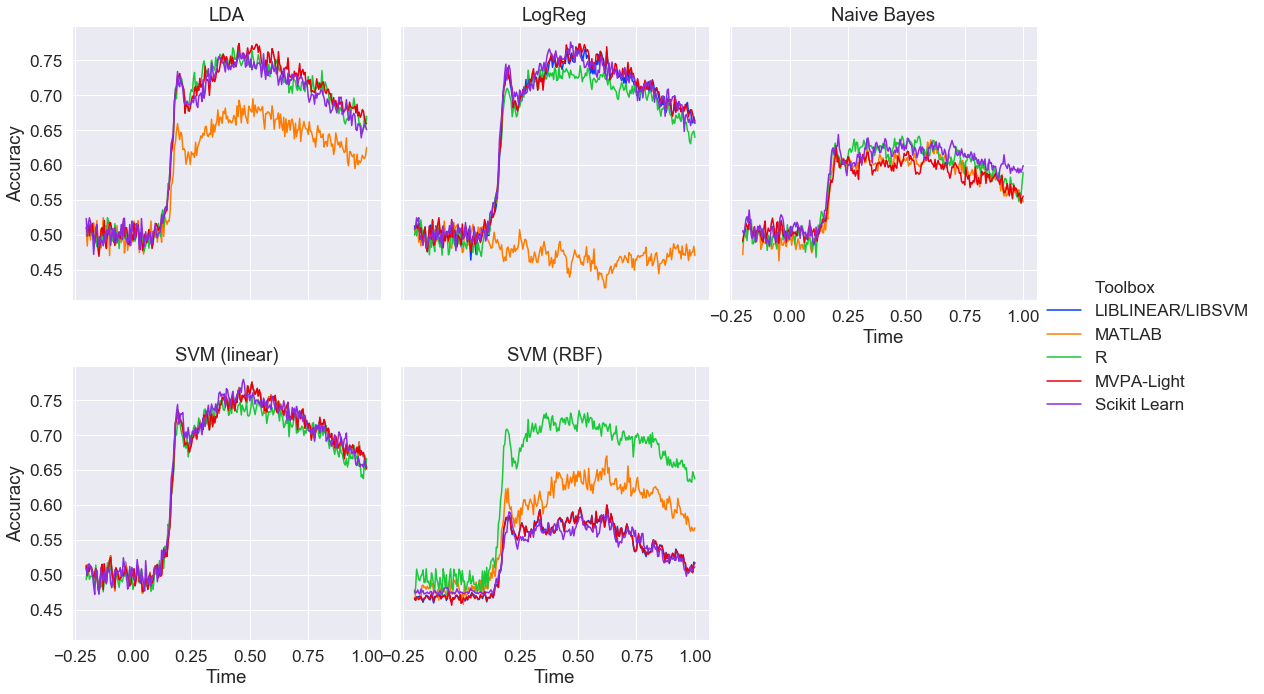

In [359]:
# sns.set_style("darkgrid")
model_order = ['LDA','LogReg','Naive Bayes','SVM (linear)', 'SVM (RBF)']
toolboxes = ['LIBLINEAR/LIBSVM', 'MATLAB', 'R', 'MVPA-Light','Scikit Learn']
sns.set(font_scale = 1.55)
#     sns.set_style(style=style)
fig = sns.relplot(x='Time', y='Accuracy', col='Model', hue='Toolbox', col_wrap=3, kind='line',
                  sizes = 2, data=df, palette=palette[:5], hue_order=toolboxes, col_order=model_order).set_titles("{col_name}")
fig.savefig("benchmark_classification.png", dpi=200)
# sns.axes_style()


In [290]:
style = {'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

# Timing

## MEG single-subjects

In [444]:
# load results
df_matlab = pd.read_csv(resultsdir + 'benchmarking_results_single_subjects_matlab_time_average.csv')
print(df_matlab.shape)
df_R = pd.read_csv(resultsdir + 'benchmarking_results_single_subjects_R_time.csv').iloc[:,1:]
print(df_R.shape)

df_scikit = pd.read_csv(resultsdir + 'benchmarking_results_single_subjects_scikit_learn_time.csv').iloc[:,1:]
print(df_scikit.shape)

(265, 23)
(265, 9)
(265, 9)


In [445]:
df_matlab['mv_ridge'].median()

0.0

In [446]:
pd.concat([pd.DataFrame(df_matlab.mean()), pd.DataFrame(df_matlab.std())], axis=1)

,0,0
mv_lda,0.002730,0.000093
mv_logreg,0.008027,0.000370
mv_nb,0.000954,0.000037
mv_svm_linear,0.050844,0.001086
mv_svm_rbf,0.012522,0.000099
mv_libsvm_linear,0.063917,0.008312
mv_libsvm_rbf,0.080514,0.000504
mv_liblinear_svm_primal,0.016873,0.001116
mv_liblinear_svm_dual,0.180084,0.016591
mv_liblinear_logreg_primal,0.010933,0.000507


In [448]:
pd.concat([pd.DataFrame(df_scikit.mean()).transpose(), pd.DataFrame(df_scikit.std()).transpose()])

,LDA,LogReg,Naive Bayes,SVM (linear),SVM (RBF),Ridge,Kernel Ridge,SVR (linear),SVR (RBF)
0,0.097244,0.100262,0.007115,0.372089,0.446551,0.006854,0.022501,0.653634,0.480706
0,0.000643,0.005179,0.000185,0.052380,0.032699,0.000360,0.003097,0.064729,0.019961


In [447]:
pd.concat([pd.DataFrame(df_R.mean()).transpose(), pd.DataFrame(df_R.std()).transpose()])

,Kernel Ridge,LDA,LogReg,Naive Bayes,Ridge,SVM (linear),SVM (RBF),SVR (linear),SVR (RBF)
0,0.0,0.084036,0.013363,0.041310,0.054996,0.710526,0.407920,1.587326,0.432058
0,0.0,0.000357,0.001863,0.000126,0.002745,0.112708,0.026906,0.093710,0.001917


## MEG super-subject

In [430]:
# load results
df_matlab = pd.read_csv(resultsdir + 'benchmarking_results_supersubject_matlab.csv')
print(df_matlab.shape)
df_R = pd.read_csv(resultsdir + 'benchmarking_results_supersubject_R_time.csv').iloc[:,1:]
print(df_R.shape)

df_scikit = pd.read_csv(resultsdir + 'benchmarking_results_supersubject_scikit_learn.csv').iloc[:,1:]
print(df_scikit.shape)

df_scikit.head()

(265, 23)
(265, 8)
(265, 9)


,LDA,LogReg,Naive Bayes,SVM (linear),SVM (RBF),Ridge,Kernel Ridge,SVR (linear),SVR (RBF)
0,0.633971,1.905830,0.091153,35.086479,34.619024,0.059284,14.524923,2.493469,34.224294
1,0.611708,2.203121,0.090260,35.405335,33.953636,0.058266,14.612343,2.529622,34.327405
2,0.601128,2.193643,0.090726,35.361889,34.102524,0.058622,14.612128,2.532214,33.925726
3,0.622561,2.159751,0.090103,35.001782,33.852150,0.058632,14.604406,2.467729,34.175700
4,0.620752,2.229343,0.090136,35.400647,34.604495,0.059357,14.612171,2.476458,34.208174


In [431]:
pd.concat([pd.DataFrame(df_matlab.mean()), pd.DataFrame(df_matlab.std())], axis=1)

,0,0
mv_lda,0.023149,0.002585
mv_logreg,0.438866,0.007366
mv_nb,0.015010,0.000177
mv_svm_linear,10.029866,1.040095
mv_svm_rbf,5.365925,0.035002
mv_libsvm_linear,42.185703,4.233097
mv_libsvm_rbf,38.011249,0.343523
mv_liblinear_svm_primal,1.333517,0.167517
mv_liblinear_svm_dual,6.272768,0.511675
mv_liblinear_logreg_primal,0.725117,0.068711


In [433]:
pd.concat([pd.DataFrame(df_scikit.mean()).transpose(), pd.DataFrame(df_scikit.std()).transpose()])

,LDA,LogReg,Naive Bayes,SVM (linear),SVM (RBF),Ridge,Kernel Ridge,SVR (linear),SVR (RBF)
0,0.595679,2.065334,0.090895,32.189096,34.561255,0.062605,14.508396,3.213436,31.608102
0,0.017034,0.108548,0.001240,2.071074,0.383327,0.005019,0.208665,0.393507,1.506523


In [432]:
pd.concat([pd.DataFrame(df_R.mean()).transpose(), pd.DataFrame(df_R.std()).transpose()])

,lda,logreg,naive bayes,ridge,SVM (linear),SVM (RBF),SVR (linear),SVR (RBF)
0,0.840113,0.159219,0.143857,0.547377,1123.158900,123.305996,465.078185,151.660834
0,0.003732,0.018247,0.000579,0.007918,27.388246,9.377947,49.827396,26.759390


## fMRI

In [436]:
# load results
df_matlab = pd.read_csv(resultsdir + 'benchmarking_results_fmri_matlab.csv')
print(df_matlab.shape)
df_R = pd.read_csv(resultsdir + 'benchmarking_results_fMRI_R.csv').iloc[:,1:]
print(df_R.shape)

df_scikit = pd.read_csv(resultsdir + 'benchmarking_results_fmri_scikit_learn.csv').iloc[:,1:]
print(df_scikit.shape)

df_scikit.head()

(6, 23)
(6, 8)
(6, 9)


,LDA,LogReg,Naive Bayes,SVM (linear),SVM (RBF),Ridge,Kernel Ridge,SVR (linear),SVR (RBF)
0,24.482263,16.999017,2.870105,10.685937,9.361745,0.641401,0.461929,17.650128,10.226631
1,24.479212,18.576799,2.875447,10.682868,9.374202,0.639483,0.483791,15.680669,10.231336
2,24.488938,21.908943,2.862142,10.663424,9.364628,0.639519,0.480879,13.829656,10.229148
3,24.437898,19.914192,2.880020,10.677484,9.367310,0.638554,0.482604,13.933966,10.228631
4,22.655695,18.040923,2.740538,9.259631,7.963466,0.599223,0.464261,12.987698,8.794900


In [438]:
pd.concat([pd.DataFrame(df_scikit.mean()).transpose(), pd.DataFrame(df_scikit.std()).transpose()])

,LDA,LogReg,Naive Bayes,SVM (linear),SVM (RBF),Ridge,Kernel Ridge,SVR (linear),SVR (RBF)
0,24.447675,20.675986,2.856715,10.461509,9.156045,0.637813,0.475948,16.13774,9.998994
0,1.103275,4.243000,0.059432,0.590876,0.586856,0.022191,0.010027,3.64005,0.590286


In [437]:
pd.concat([pd.DataFrame(df_R.mean()).transpose(), pd.DataFrame(df_R.std()).transpose()])

,lda,logreg,naive bayes,ridge,SVM (linear),SVM (RBF),SVR (linear),SVR (RBF)
0,0.0,7.102167,18.484667,7.502667,39.670000,43.306333,37.210500,41.036833
0,0.0,1.133894,0.353763,0.592509,1.979826,2.181627,2.055681,2.298222
